In [1]:
import pandas
# read our datya from data folder called bank.csv
data = pandas.read_csv("data/Mall_Customers.csv")
data

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15.0,39.0
1,2,Male,21,15.0,81.0
2,3,Female,20,16.0,6.0
3,4,Female,23,16.0,77.0
4,5,Female,31,17.0,40.0
...,...,...,...,...,...
195,196,Female,35,120.0,79.0
196,197,Female,45,126.0,NaN
197,198,Male,32,126.0,74.0
198,199,Male,32,137.0,18.0


In [2]:
# check if our data has empties
data.isnull().sum()


CustomerID        0
Gender            4
Age               0
Annual Income     1
Spending Score    3
dtype: int64

In [3]:
# we clean our data, replace the unkmowm for gender
data["Gender"].fillna("unknown", inplace=True)
data.isnull().sum()

/tmp/ipykernel_2113/1035748993.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Gender"].fillna("unknown", inplace=True)


CustomerID        0
Gender            0
Age               0
Annual Income     1
Spending Score    3
dtype: int64

In [4]:
# lets clean the data for annual income replace empties with the mean
data["Annual Income"].mean()


60.35678391959799

In [5]:
mean = 60.35678391959799

data["Annual Income"].fillna( mean, inplace=True)
data.isnull().sum()


/tmp/ipykernel_2113/1572373272.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Annual Income"].fillna( mean, inplace=True)


CustomerID        0
Gender            0
Age               0
Annual Income     0
Spending Score    3
dtype: int64

In [6]:
SpendingScore = data["Spending Score"].mean()
data["Spending Score"].fillna( SpendingScore, inplace=True)
data.isnull().sum()




/tmp/ipykernel_2113/48569446.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Spending Score"].fillna( SpendingScore, inplace=True)


CustomerID        0
Gender            0
Age               0
Annual Income     0
Spending Score    0
dtype: int64

In [7]:
# splitting the data into segemnets or clusters
# split data
array = data.values
X = array[: ,2: 5]
X

array([[19, 15.0, 39.0],
       [21, 15.0, 81.0],
       [20, 16.0, 6.0],
       [23, 16.0, 77.0],
       [31, 17.0, 40.0],
       [22, 17.0, 76.0],
       [35, 18.0, 6.0],
       [23, 18.0, 94.0],
       [64, 19.0, 3.0],
       [30, 19.0, 72.0],
       [67, 19.0, 14.0],
       [35, 19.0, 99.0],
       [58, 20.0, 15.0],
       [24, 20.0, 77.0],
       [37, 20.0, 13.0],
       [22, 20.0, 79.0],
       [35, 21.0, 35.0],
       [20, 21.0, 66.0],
       [52, 23.0, 29.0],
       [35, 23.0, 98.0],
       [35, 24.0, 35.0],
       [25, 24.0, 73.0],
       [46, 25.0, 5.0],
       [31, 25.0, 73.0],
       [54, 28.0, 14.0],
       [29, 28.0, 82.0],
       [45, 28.0, 32.0],
       [35, 28.0, 61.0],
       [40, 29.0, 31.0],
       [23, 29.0, 87.0],
       [60, 30.0, 4.0],
       [21, 30.0, 73.0],
       [53, 33.0, 4.0],
       [18, 33.0, 92.0],
       [49, 33.0, 14.0],
       [21, 33.0, 81.0],
       [42, 34.0, 17.0],
       [30, 34.0, 73.0],
       [36, 37.0, 26.0],
       [20, 37.0, 75.0],
      

In [9]:
# group the data into segments
# we specify the number of clusters we want
# we arev going to use kmeans

from sklearn.cluster import KMeans

# Define the number of clusters (segments)
clusters = 10  # You can change this value depending on your use case

# Apply K-Means
model = KMeans(n_clusters=clusters, random_state=42)
model.fit(X)



KMeans(n_clusters=10, random_state=42)

In [11]:
# lets view the groups or clustters that we've created 
ourclusters = model.cluster_centers_
ourclusters

array([[ 56.34090909,  53.70454545,  49.38636364],
       [ 33.1       ,  74.95      ,  82.4       ],
       [ 45.92857143,  98.42857143,  22.42857143],
       [ 25.27272727,  25.72727273,  79.36363636],
       [ 49.        ,  24.46153846,  11.07692308],
       [ 27.16666667,  58.37102178,  50.7034687 ],
       [ 38.05      ,  77.05      ,  14.2       ],
       [ 32.        ,  92.38461538,  82.30769231],
       [ 35.41666667,  30.75      ,  36.08333333],
       [ 35.5       , 122.5       ,  71.2749577 ]])

In [13]:
# tabulate the array 
table = pandas.DataFrame(ourclusters, columns=["Age", "Annual Income", "Spending Score"])
table

,Age,Annual Income,Spending Score
0,56.340909,53.704545,49.386364
1,33.100000,74.950000,82.400000
2,45.928571,98.428571,22.428571
3,25.272727,25.727273,79.363636
4,49.000000,24.461538,11.076923
5,27.166667,58.371022,50.703469
6,38.050000,77.050000,14.200000
7,32.000000,92.384615,82.307692
8,35.416667,30.750000,36.083333
9,35.500000,122.500000,71.274958


In [19]:
# putting customers into their respective groups/segements
# first we need to create a new column for group numbers
data["group_numbers"]= model.labels_
data
data.to_excel('customers_with_groups.xlsx', index=False)


ModuleNotFoundError: No module named 'openpyxl'

In [20]:
data["group_numbers"]= model.labels_
data
data.to_excel('customers_with_groups.xlsx', index=False)


ModuleNotFoundError: No module named 'openpyxl'

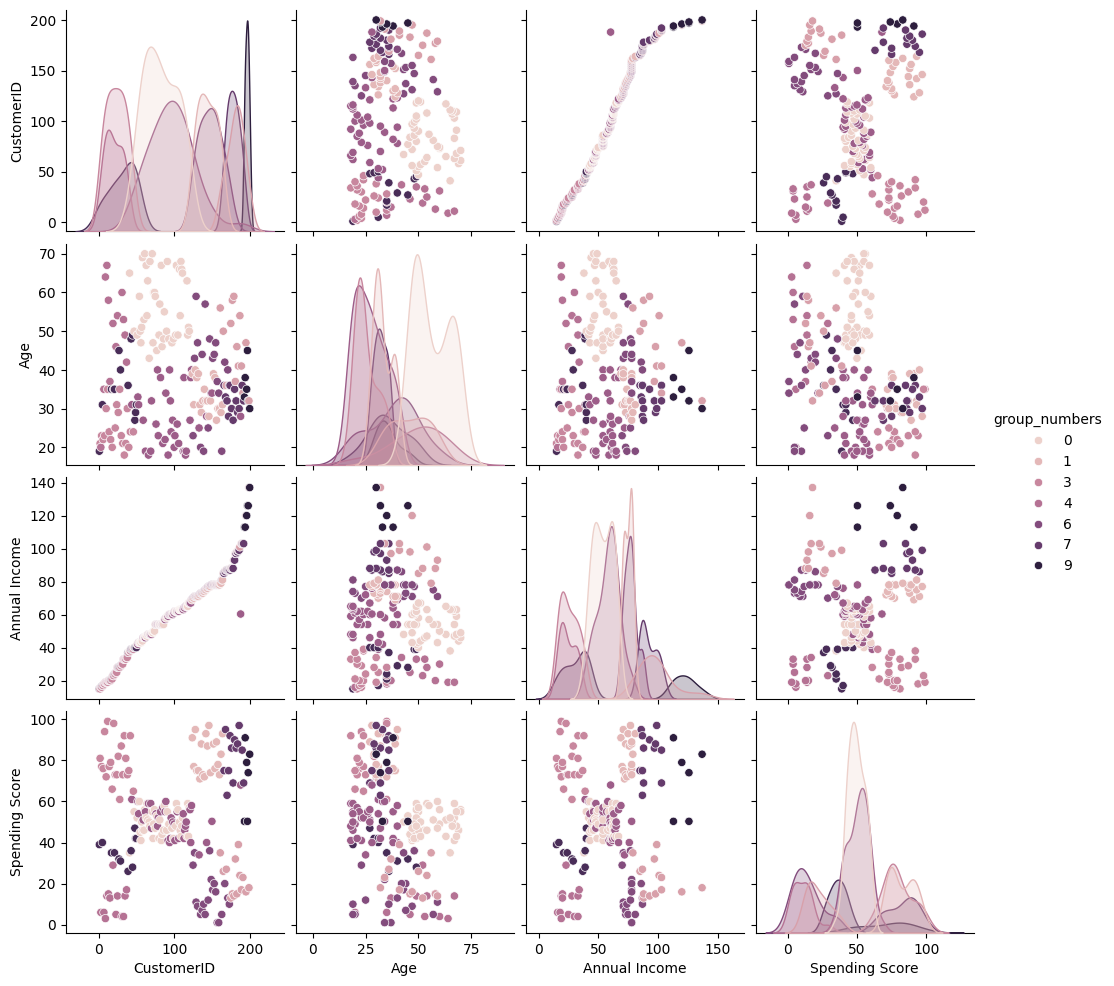

In [21]:
# pair plot 
import seaborn
import matplotlib.pyplot as plt 
seaborn.pairplot(data,hue="group_numbers")